# **Capstone Project: Establishing a Security Service in Denver, Colorado** 
#### _by Fabian Williams_

## **Part 1: Business problem and data description**

## **Introduction**
The intent of this project is to provide investors information to support their decision to establish a security service in Denver, Colorado. This document was prepared based on several months of research, data extraction and analysis. The information used in this report is real and was accessed from the Denver, CO county database and clusters using the Foursquare api.

**About Denver, Colorado**  
Denver, is the capital of the U.S. state of Colorado. Denver is located in the South Platte River Valley on the western edge of the High Plains just east of the Front Range of the Rocky Mountains. The Denver downtown district is immediately east of the confluence of Cherry Creek with the South Platte River, approximately 12 mi (19 km) east of the foothills of the Rocky Mountains. Denver is named after James W. Denver, a governor of the Kansas Territory. It is nicknamed the Mile High City because its official elevation is exactly one mile (5280 feet or 1609.3 meters) above sea level. The 105th meridian west of Greenwich, the longitudinal reference for the Mountain Time Zone, passes directly through Denver Union Station.

Denver is ranked as a _Beta_ world city by the Globalization and World Cities Research Network. With an estimated population of 716,492 in 2018, Denver is the 19th-most populous U.S. city, and with a 19.38% increase since the 2010 United States Census, it has been one of the fastest-growing major cities in the United States. 

* The 10-county Denver-Aurora-Lakewood, CO Metropolitan Statistical Area had an estimated 2018 population of 2,932,415 and is the 19th most populous U.S. metropolitan statistical area.
* The 12-city Denver-Aurora, CO Combined Statistical Area had an estimated 2018 population of 3,572,798 and is the 15th most populous U.S. metropolitan area.
* In 2016, Denver was named the best place to live in the United States by U.S. News & World Report.

_Source: https://en.wikipedia.org/wiki/Denver_

### The Business Problem
Though rated the best place to live can, it considered a safe place to do business. Investors in a security firm would like to perform a study of the neighborhood crime within Denver, CO, specifically burglary. The company's intent is to identify neighbourhoods with high burglary rates. The crimes within a city are varied, but this frim speciallizes in anti-burglary security services. One of the key features of the security service is the installation of closed circuit camera grid near businesses. The segmentation of these businesses will also form apart of the project planning process, as all neighborhoods will not be launched at the same time.

Other uses of the case study:
* Families or individuals relocating to Denver, CO
* Real Estate companies seeking key selling features of the city, as the venues are clustered
* City Offices/Governor looking to gentrify a high crime area.

##### **Success Criteria: Use the data to recommend the first neighborhood to be launched.**

### Data Processing & Description
This project will require the analysis of Denver, CO neighborhood crime statistics and the clustering of the neighborhoods in order to recommend the first neighbourhood. 

The crime database accessed for this project was from www.denvergov.org. This database provided the Denver, CO crime data: https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv. 
* Author: City and County of Denver, Denver Police Department / Data Analysis Unit
* Maintainer: City and County of Denver, Technology Services / DenverGIS Data
* Version: 1.0.2921
* Data was last updated on 11/21/2019

This dataset includes criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date. The data is based on the National Incident Based Reporting System (NIBRS) which includes all victims of person crimes and all crimes within an incident. The data is dynamic, which allows for additions, deletions and/or modifications at any time, resulting in more accurate information in the database. Due to continuous data entry, the number of records in subsequent extractions are subject to change. Crime data is updated Monday through Friday. Crimes that occurred at least 30 days ago tend to be the most accurate, although records are returned for incidents that happened yesterday. This dynamic nature of crime data means that content provided here today will probably differ from content provided a week from now. Likewise, content provided on this site will probably differ somewhat from crime statistics published elsewhere by the City and County of Denver, even though they draw from the same database. Crime locations reflect the approximate locations of crimes but are not mapped to actual property parcels. Certain crimes may not appear on maps if there is insufficient detail to establish a specific, mappable location. 

The data will be wrangled to only indicate neighborhoods where only burglary crimes have been committed. This data will then be used with the FourSquare API to look at the venues in the neighborhoods.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# import crime data from Denver, CO county website:
dco_crime = pd.read_csv('https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv')

In [3]:
# Denver, CO crime data table columns
dco_crime.dtypes

INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                     float64
GEO_Y                     float64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                 int64
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

In [4]:
# clean up the dataset to remove unnecessary columns
dco_crime.drop(['INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION','OFFENSE_TYPE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE','INCIDENT_ADDRESS','GEO_X','GEO_Y','DISTRICT_ID','PRECINCT_ID','IS_TRAFFIC'],axis=1,inplace=True)

# make all column labels of type string
dco_crime.columns = list(map(str, dco_crime.columns))

#dropping null data from data set
dco_crime = dco_crime.dropna()

# reindexing data
dco_crime.reset_index(drop=True)

#view the first 5 rows
dco_crime.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,-104.809881,39.773188,montbello,1
1,larceny,-104.781434,39.785649,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,-104.957381,39.663490,wellshire,1
3,larceny,-104.941440,39.702698,belcaro,1
4,larceny,-104.955370,39.717107,cherry-creek,1


In [5]:
#remove rows where IS_CRIME = 0
den_crime = dco_crime[dco_crime.IS_CRIME != 0]
den_crime.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,-104.809881,39.773188,montbello,1
1,larceny,-104.781434,39.785649,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,-104.957381,39.663490,wellshire,1
3,larceny,-104.941440,39.702698,belcaro,1
4,larceny,-104.955370,39.717107,cherry-creek,1


In [6]:
# Type of Crimes committed in Denver, CO
df_crime = den_crime[['OFFENSE_CATEGORY_ID', 'IS_CRIME']]
dfc_plt = df_crime.groupby('OFFENSE_CATEGORY_ID').count()
dfc_plt.sort_values(by='IS_CRIME', ascending=False, inplace=True)
dfc_plt.reset_index(inplace=True)
dfc_plt.set_index('OFFENSE_CATEGORY_ID', inplace=True)
dfc_plt

,IS_CRIME
OFFENSE_CATEGORY_ID,
all-other-crimes,95181
public-disorder,54815
larceny,53753
theft-from-motor-vehicle,40295
drug-alcohol,34534
auto-theft,28200
other-crimes-against-persons,26040
burglary,26001
aggravated-assault,12627


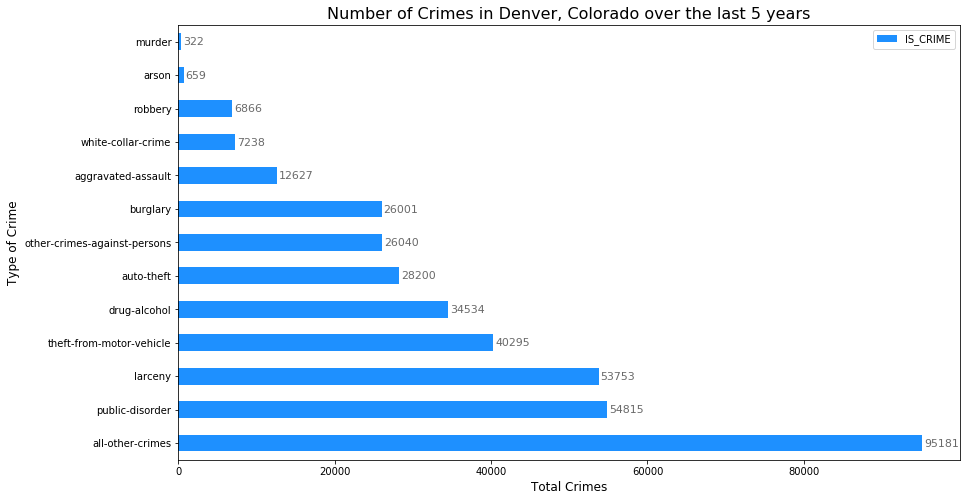

In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# generate plot
ax = dfc_plt.plot(kind='barh', figsize=(14, 8), color='dodgerblue')
ax.set_xlabel('Total Crimes', fontsize=12)
ax.set_ylabel('Type of Crime', fontsize=12)
ax.set_title('Number of Crimes in Denver, Colorado over the last 5 years', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+250, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.show()

In [8]:
#Show max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Creating the Denver, CO burglary crime data frame
df_burglary = den_crime[den_crime.OFFENSE_CATEGORY_ID == 'burglary'].reset_index(drop=True)
df_burglary.drop(['OFFENSE_CATEGORY_ID','IS_CRIME'], axis=1, inplace=True)
df_burglary = df_burglary[['NEIGHBORHOOD_ID','GEO_LON','GEO_LAT']]
den_burglary = df_burglary.groupby('NEIGHBORHOOD_ID')
dco_burglary = den_burglary.first()
dco_burglary.reset_index(inplace=True)
dco_burglary

,NEIGHBORHOOD_ID,GEO_LON,GEO_LAT
0,athmar-park,-105.024240,39.697324
1,auraria,-105.004869,39.744035
2,baker,-104.992622,39.711534
3,barnum,-105.028408,39.712805
4,barnum-west,-105.052573,39.719299
5,bear-valley,-105.080551,39.662599
6,belcaro,-104.951857,39.702728
7,berkeley,-105.040096,39.781620
8,capitol-hill,-104.978476,39.738691
9,cbd,-104.994496,39.747944


In [9]:
!conda install -c conda-forge folium --yes
import folium
from folium import plugins

Solving environment: / 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [10]:
# Denver, C0 latitude and longitude values
latitude = 39.7392
longitude = -104.9903

# create map and display it
dco_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(dco_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(dco_burglary.GEO_LAT, dco_burglary.GEO_LON):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
dco_map